# Adipurush Sentiment Analysis: Harnessing Machine Learning to Understand Twitter Buzz

In [200]:
import pandas as pd

In [201]:
import matplotlib.pyplot as plt
import seaborn as sns

In [202]:
import warnings
warnings.filterwarnings('ignore')

In [203]:
df = pd.read_csv('adipurush_tweets.csv')

In [204]:
df

Date Created  Number of Likes  Source of Tweet   
0      2023-06-30 09:21:00+00:00                0              NaN  \
1      2023-06-30 09:20:57+00:00                0              NaN   
2      2023-06-30 09:20:22+00:00                0              NaN   
3      2023-06-30 09:20:00+00:00                3              NaN   
4      2023-06-30 09:15:22+00:00                3              NaN   
...                          ...              ...              ...   
9996   2023-06-23 10:08:50+00:00                0              NaN   
9997   2023-06-23 10:08:49+00:00                0              NaN   
9998   2023-06-23 10:08:17+00:00             3101              NaN   
9999   2023-06-23 10:08:01+00:00                0              NaN   
10000  2023-06-23 10:07:45+00:00                0              NaN   

                                                  Tweets  
0      #ENGvAUS #ENGvsAUS #AUSvENG #AUSvsENG #Adipuru...  
1      Now Playing!! Book Your Ticket Now!! 🎥🍿🎟️\n@go...  
2                                 @ponilemova #Adipurush  
3      Adipurush VS 72 Hoorain VS The Kerala Story Co...  
4                 ST: #Adipurush https://t.co/lsGKcgQuKL  
...                                                  ...  
9996   Adipurush 1st Week WW Box Office Collections: ...  
9997   #GodMorningFriday\nवास्तव में #Adipurush यानि ...  
9998   Let the empowering lyrics of #Shivoham elevate...  
9999   When it comes to choosing a service or product...  
10000  A film about #Ramayana, our greatest epic coul...  

[10001 rows x 4 columns]

In [205]:
df.shape

(10001, 4)

In [206]:
df.columns

Index(['Date Created', 'Number of Likes', 'Source of Tweet', 'Tweets'], dtype='object')

In [207]:
df.duplicated().sum()

1

In [208]:
df = df.drop_duplicates()

In [209]:
df.isnull().sum()

Date Created           0
Number of Likes        0
Source of Tweet    10000
Tweets                 0
dtype: int64

In [210]:
df = df.drop('Source of Tweet', axis = 1)

In [211]:
df

Date Created  Number of Likes   
0      2023-06-30 09:21:00+00:00                0  \
1      2023-06-30 09:20:57+00:00                0   
2      2023-06-30 09:20:22+00:00                0   
3      2023-06-30 09:20:00+00:00                3   
4      2023-06-30 09:15:22+00:00                3   
...                          ...              ...   
9996   2023-06-23 10:08:50+00:00                0   
9997   2023-06-23 10:08:49+00:00                0   
9998   2023-06-23 10:08:17+00:00             3101   
9999   2023-06-23 10:08:01+00:00                0   
10000  2023-06-23 10:07:45+00:00                0   

                                                  Tweets  
0      #ENGvAUS #ENGvsAUS #AUSvENG #AUSvsENG #Adipuru...  
1      Now Playing!! Book Your Ticket Now!! 🎥🍿🎟️\n@go...  
2                                 @ponilemova #Adipurush  
3      Adipurush VS 72 Hoorain VS The Kerala Story Co...  
4                 ST: #Adipurush https://t.co/lsGKcgQuKL  
...                                                  ...  
9996   Adipurush 1st Week WW Box Office Collections: ...  
9997   #GodMorningFriday\nवास्तव में #Adipurush यानि ...  
9998   Let the empowering lyrics of #Shivoham elevate...  
9999   When it comes to choosing a service or product...  
10000  A film about #Ramayana, our greatest epic coul...  

[10000 rows x 3 columns]

In [212]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 0 to 10000
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Date Created     10000 non-null  object
 1   Number of Likes  10000 non-null  int64 
 2   Tweets           10000 non-null  object
dtypes: int64(1), object(2)
memory usage: 312.5+ KB


In [213]:
df.describe()

Number of Likes
count     10000.000000
mean         73.544500
std         369.705682
min           0.000000
25%           0.000000
50%           1.000000
75%           9.000000
max       14778.000000

In [214]:
df.nunique()

Date Created       9831
Number of Likes     718
Tweets             9874
dtype: int64

In [215]:
df_sorted = df.sort_values(by='Number of Likes', ascending=False)

In [216]:
df_sorted.head(10)

Date Created  Number of Likes   
5036  2023-06-26 02:51:52+00:00            14778  \
2975  2023-06-27 12:35:31+00:00             8266   
8180  2023-06-24 09:10:09+00:00             8112   
3593  2023-06-27 02:23:37+00:00             7010   
6069  2023-06-25 07:20:59+00:00             5580   
3601  2023-06-27 01:59:03+00:00             5149   
4744  2023-06-26 06:20:58+00:00             4912   
4716  2023-06-26 06:30:01+00:00             4788   
5636  2023-06-25 13:08:17+00:00             4741   
1559  2023-06-28 14:40:47+00:00             4561   

                                                 Tweets  
5036  Pan India Star #Prabhas clearly said NO for #A...  
2975  #Breaking: Comments by Allahabad high court to...  
8180  #Adipurush #Prabhas #BhushanKumar https://t.co...  
3593  आदिपुरुष निर्माताओं को लगा एक और झटका, इलाहाबा...  
6069  👉#AdiPurush Telugu Version Hits 100CR SHARE💥💥💥...  
3601  #Adipurush WW BO\n\nZOOMS past ₹4⃣0⃣0⃣ cr.\n\n...  
4744  #Adipurush goes from strength to strength at t...  
4716  We are incredibly touched by the overwhelming ...  
5636  Witness the epic saga unfold!🏹 \nBook your tic...  
1559  कुरान पर गलत तथ्यों के साथ एक छोटी सी डॉक्यूमे...

In [217]:
df['Date Created'] = pd.to_datetime(df['Date Created'])

In [218]:
df

Date Created  Number of Likes   
0     2023-06-30 09:21:00+00:00                0  \
1     2023-06-30 09:20:57+00:00                0   
2     2023-06-30 09:20:22+00:00                0   
3     2023-06-30 09:20:00+00:00                3   
4     2023-06-30 09:15:22+00:00                3   
...                         ...              ...   
9996  2023-06-23 10:08:50+00:00                0   
9997  2023-06-23 10:08:49+00:00                0   
9998  2023-06-23 10:08:17+00:00             3101   
9999  2023-06-23 10:08:01+00:00                0   
10000 2023-06-23 10:07:45+00:00                0   

                                                  Tweets  
0      #ENGvAUS #ENGvsAUS #AUSvENG #AUSvsENG #Adipuru...  
1      Now Playing!! Book Your Ticket Now!! 🎥🍿🎟️\n@go...  
2                                 @ponilemova #Adipurush  
3      Adipurush VS 72 Hoorain VS The Kerala Story Co...  
4                 ST: #Adipurush https://t.co/lsGKcgQuKL  
...                                                  ...  
9996   Adipurush 1st Week WW Box Office Collections: ...  
9997   #GodMorningFriday\nवास्तव में #Adipurush यानि ...  
9998   Let the empowering lyrics of #Shivoham elevate...  
9999   When it comes to choosing a service or product...  
10000  A film about #Ramayana, our greatest epic coul...  

[10000 rows x 3 columns]

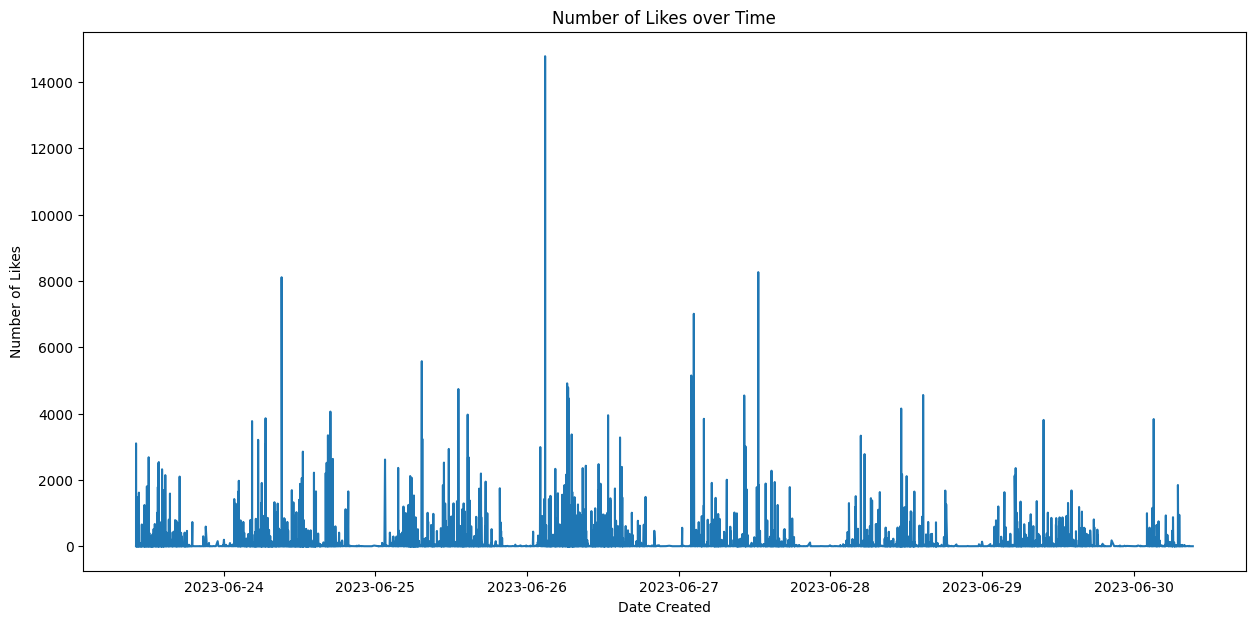

In [219]:
df_sorted_date = df.sort_values('Date Created')
plt.figure(figsize=[15,7],)
plt.plot(df_sorted_date['Date Created'], df_sorted_date['Number of Likes'])
plt.xlabel('Date Created')
plt.ylabel('Number of Likes')
plt.title('Number of Likes over Time')
plt.show()

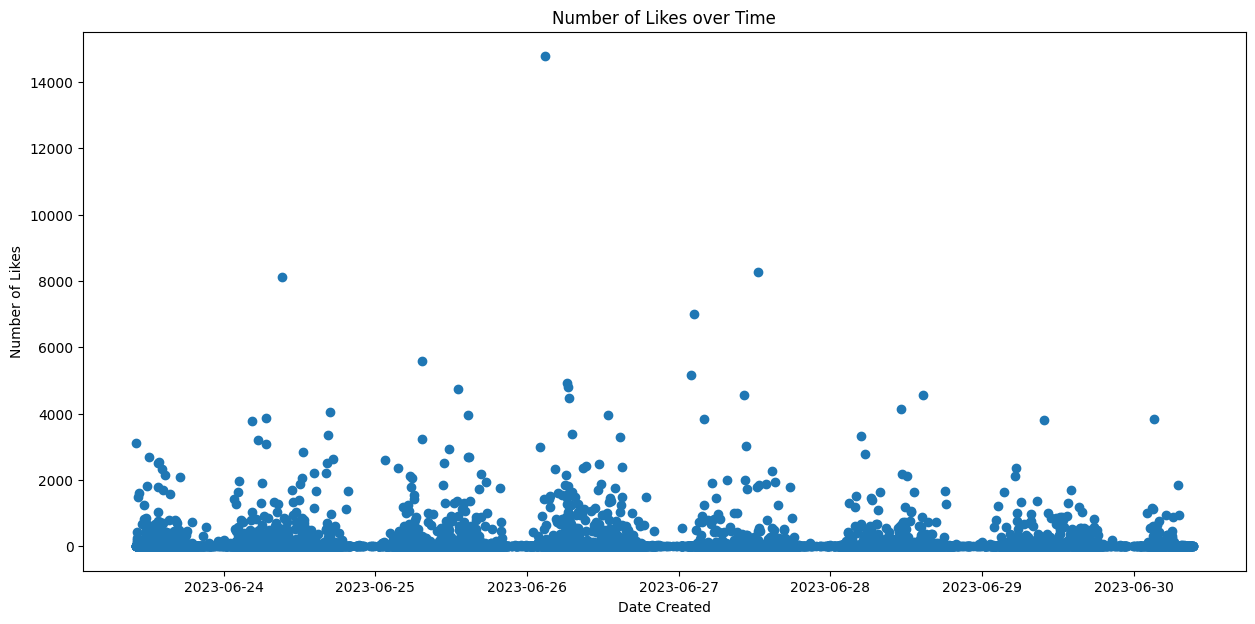

In [220]:
plt.figure(figsize=[15,7],)
plt.scatter(df_sorted_date['Date Created'], df_sorted_date['Number of Likes'])
plt.xlabel('Date Created')
plt.ylabel('Number of Likes')
plt.title('Number of Likes over Time')
plt.show()

In [221]:
import plotly.express as px

fig = px.scatter(df_sorted_date, x='Date Created', y='Number of Likes', title='Number of Likes over Time')
fig.update_layout(xaxis=dict(title='Date Created'), yaxis=dict(title='Number of Likes'))
fig.show()

In [222]:
import re
import string
from tqdm.notebook import tqdm
from datetime import datetime
import dateutil.parser

In [223]:
import nltk
from spellchecker import SpellChecker
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA

In [224]:
from wordcloud import WordCloud, ImageColorGenerator
from nltk.corpus import stopwords
import random 

In [225]:
nltk.download('vader_lexicon')
nltk.download('stopwords')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [226]:
languages = stopwords.fileids()

# Print the number of supported languages
print("Number of supported languages:", len(languages))

# Print the list of supported languages
print("Supported languages:", languages)

Number of supported languages: 29
Supported languages: ['arabic', 'azerbaijani', 'basque', 'bengali', 'catalan', 'chinese', 'danish', 'dutch', 'english', 'finnish', 'french', 'german', 'greek', 'hebrew', 'hinglish', 'hungarian', 'indonesian', 'italian', 'kazakh', 'nepali', 'norwegian', 'portuguese', 'romanian', 'russian', 'slovene', 'spanish', 'swedish', 'tajik', 'turkish']


In [227]:
from nltk.tokenize import TweetTokenizer

In [228]:
english_stopwords = stopwords.words('english')
hinglish_stopwords = stopwords.words('hinglish')

In [229]:
def clean_tweet(tweet):
    # Remove URLs, hashtags, mentions, and special characters
    tweet = re.sub(r"http\S+|www\S+|@\w+|#\w+", "", tweet)
    tweet = re.sub(r"[^\w\s]", "", tweet)

    # Tokenize the tweet
    tokenizer = TweetTokenizer(preserve_case=False, reduce_len=True, strip_handles=True)
    tokens = tokenizer.tokenize(tweet)

    # Remove stopwords for English and Hinglish
    tokens = [token for token in tokens if token not in english_stopwords and token not in hinglish_stopwords]

    # Remove punctuation and convert to lowercase
    tokens = [token.translate(str.maketrans('', '', string.punctuation)) for token in tokens]
    tokens = [token.lower() for token in tokens]

    # Join tokens back into a string
    cleaned_tweet = ' '.join(tokens)

    return cleaned_tweet

In [230]:
df['Cleaned_Tweets'] = df['Tweets'].apply(clean_tweet)

In [231]:
df

Date Created  Number of Likes   
0     2023-06-30 09:21:00+00:00                0  \
1     2023-06-30 09:20:57+00:00                0   
2     2023-06-30 09:20:22+00:00                0   
3     2023-06-30 09:20:00+00:00                3   
4     2023-06-30 09:15:22+00:00                3   
...                         ...              ...   
9996  2023-06-23 10:08:50+00:00                0   
9997  2023-06-23 10:08:49+00:00                0   
9998  2023-06-23 10:08:17+00:00             3101   
9999  2023-06-23 10:08:01+00:00                0   
10000 2023-06-23 10:07:45+00:00                0   

                                                  Tweets   
0      #ENGvAUS #ENGvsAUS #AUSvENG #AUSvsENG #Adipuru...  \
1      Now Playing!! Book Your Ticket Now!! 🎥🍿🎟️\n@go...   
2                                 @ponilemova #Adipurush   
3      Adipurush VS 72 Hoorain VS The Kerala Story Co...   
4                 ST: #Adipurush https://t.co/lsGKcgQuKL   
...                                                  ...   
9996   Adipurush 1st Week WW Box Office Collections: ...   
9997   #GodMorningFriday\nवास्तव में #Adipurush यानि ...   
9998   Let the empowering lyrics of #Shivoham elevate...   
9999   When it comes to choosing a service or product...   
10000  A film about #Ramayana, our greatest epic coul...   

                                          Cleaned_Tweets  
0      womens ashes 2023 live streaming broadcast tv ...  
1                                    playing book ticket  
2                                                         
3      adipurush vs 72 hoorain vs kerala story contro...  
4                                                     st  
...                                                  ...  
9996   adipurush 1st week ww box office collections ఆ...  
9997   वसतव म यन सबस पहल भगवन जसन सरव सषट क रचन क ह व...  
9998   empowering lyrics elevate spirit envelop world...  
9999   choosing service product beneficial opt authen...  
10000  film greatest epic earn boc worth budget shame...  

[10000 rows x 4 columns]

In [232]:
def clean_text(text):
    text = text.lower() 
    return text.strip()

In [233]:
df.Cleaned_Tweets = df.Cleaned_Tweets.apply(lambda x: clean_text(x))

In [234]:
def tokenization(text):
    tokens = re.split('W+',text)
    return tokens

In [235]:
df.Cleaned_Tweets = df.Cleaned_Tweets.apply(lambda x: tokenization(x))

df

In [236]:
df

Date Created  Number of Likes   
0     2023-06-30 09:21:00+00:00                0  \
1     2023-06-30 09:20:57+00:00                0   
2     2023-06-30 09:20:22+00:00                0   
3     2023-06-30 09:20:00+00:00                3   
4     2023-06-30 09:15:22+00:00                3   
...                         ...              ...   
9996  2023-06-23 10:08:50+00:00                0   
9997  2023-06-23 10:08:49+00:00                0   
9998  2023-06-23 10:08:17+00:00             3101   
9999  2023-06-23 10:08:01+00:00                0   
10000 2023-06-23 10:07:45+00:00                0   

                                                  Tweets   
0      #ENGvAUS #ENGvsAUS #AUSvENG #AUSvsENG #Adipuru...  \
1      Now Playing!! Book Your Ticket Now!! 🎥🍿🎟️\n@go...   
2                                 @ponilemova #Adipurush   
3      Adipurush VS 72 Hoorain VS The Kerala Story Co...   
4                 ST: #Adipurush https://t.co/lsGKcgQuKL   
...                                                  ...   
9996   Adipurush 1st Week WW Box Office Collections: ...   
9997   #GodMorningFriday\nवास्तव में #Adipurush यानि ...   
9998   Let the empowering lyrics of #Shivoham elevate...   
9999   When it comes to choosing a service or product...   
10000  A film about #Ramayana, our greatest epic coul...   

                                          Cleaned_Tweets  
0      [womens ashes 2023 live streaming broadcast tv...  
1                                  [playing book ticket]  
2                                                     []  
3      [adipurush vs 72 hoorain vs kerala story contr...  
4                                                   [st]  
...                                                  ...  
9996   [adipurush 1st week ww box office collections ...  
9997   [वसतव म यन सबस पहल भगवन जसन सरव सषट क रचन क ह ...  
9998   [empowering lyrics elevate spirit envelop worl...  
9999   [choosing service product beneficial opt authe...  
10000  [film greatest epic earn boc worth budget sham...  

[10000 rows x 4 columns]

In [237]:
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

In [238]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [239]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [240]:
def lemmatizer(text):
    lemm_text = "".join([wordnet_lemmatizer.lemmatize(word) for word in text])
    return lemm_text

In [241]:
df.Cleaned_Tweets = df.Cleaned_Tweets.apply(lambda x: lemmatizer(x))

In [242]:
def remove_digits(text):
    clean_text = re.sub(r"\b[0-9]+\b\s*", "", text)
    return(text)

In [243]:
df.Cleaned_Tweets = df.Cleaned_Tweets.apply(lambda x: remove_digits(x))

In [244]:
def remove_digits1(sample_text):
    clean_text = " ".join([w for w in sample_text.split() if not w.isdigit()]) 
    return(clean_text)

In [245]:
df.Cleaned_Tweets = df.Cleaned_Tweets.apply(lambda x: remove_digits1(x))

In [246]:
from langdetect import detect

def detect_language(text):
    try:
        lang = detect(text)
        return lang
    except:
        return None

df['Language'] = df['Cleaned_Tweets'].apply(detect_language)

In [247]:
df

Date Created  Number of Likes   
0     2023-06-30 09:21:00+00:00                0  \
1     2023-06-30 09:20:57+00:00                0   
2     2023-06-30 09:20:22+00:00                0   
3     2023-06-30 09:20:00+00:00                3   
4     2023-06-30 09:15:22+00:00                3   
...                         ...              ...   
9996  2023-06-23 10:08:50+00:00                0   
9997  2023-06-23 10:08:49+00:00                0   
9998  2023-06-23 10:08:17+00:00             3101   
9999  2023-06-23 10:08:01+00:00                0   
10000 2023-06-23 10:07:45+00:00                0   

                                                  Tweets   
0      #ENGvAUS #ENGvsAUS #AUSvENG #AUSvsENG #Adipuru...  \
1      Now Playing!! Book Your Ticket Now!! 🎥🍿🎟️\n@go...   
2                                 @ponilemova #Adipurush   
3      Adipurush VS 72 Hoorain VS The Kerala Story Co...   
4                 ST: #Adipurush https://t.co/lsGKcgQuKL   
...                                                  ...   
9996   Adipurush 1st Week WW Box Office Collections: ...   
9997   #GodMorningFriday\nवास्तव में #Adipurush यानि ...   
9998   Let the empowering lyrics of #Shivoham elevate...   
9999   When it comes to choosing a service or product...   
10000  A film about #Ramayana, our greatest epic coul...   

                                          Cleaned_Tweets Language  
0      womens ashes live streaming broadcast tv chann...       en  
1                                    playing book ticket       en  
2                                                            None  
3      adipurush vs hoorain vs kerala story controver...       en  
4                                                     st       no  
...                                                  ...      ...  
9996   adipurush 1st week ww box office collections ఆ...       en  
9997   वसतव म यन सबस पहल भगवन जसन सरव सषट क रचन क ह व...       hi  
9998   empowering lyrics elevate spirit envelop world...       en  
9999   choosing service product beneficial opt authen...       en  
10000  film greatest epic earn boc worth budget shame...       en  

[10000 rows x 5 columns]

In [248]:
df1 = df.copy()

In [249]:
df1['english_tweets'] = df[df['Language'] == 'en']['Cleaned_Tweets']

In [250]:
df1.head(3)

Date Created  Number of Likes   
0 2023-06-30 09:21:00+00:00                0  \
1 2023-06-30 09:20:57+00:00                0   
2 2023-06-30 09:20:22+00:00                0   

                                              Tweets   
0  #ENGvAUS #ENGvsAUS #AUSvENG #AUSvsENG #Adipuru...  \
1  Now Playing!! Book Your Ticket Now!! 🎥🍿🎟️\n@go...   
2                             @ponilemova #Adipurush   

                                      Cleaned_Tweets Language   
0  womens ashes live streaming broadcast tv chann...       en  \
1                                playing book ticket       en   
2                                                        None   

                                      english_tweets  
0  womens ashes live streaming broadcast tv chann...  
1                                playing book ticket  
2                                                NaN

In [251]:
df1 = df1.dropna()

In [252]:
df1.head(3)

Date Created  Number of Likes   
0 2023-06-30 09:21:00+00:00                0  \
1 2023-06-30 09:20:57+00:00                0   
3 2023-06-30 09:20:00+00:00                3   

                                              Tweets   
0  #ENGvAUS #ENGvsAUS #AUSvENG #AUSvsENG #Adipuru...  \
1  Now Playing!! Book Your Ticket Now!! 🎥🍿🎟️\n@go...   
3  Adipurush VS 72 Hoorain VS The Kerala Story Co...   

                                      Cleaned_Tweets Language   
0  womens ashes live streaming broadcast tv chann...       en  \
1                                playing book ticket       en   
3  adipurush vs hoorain vs kerala story controver...       en   

                                      english_tweets  
0  womens ashes live streaming broadcast tv chann...  
1                                playing book ticket  
3  adipurush vs hoorain vs kerala story controver...

In [253]:
df1['Year'] = df1['Date Created'].dt.year
df1['Month'] = df1['Date Created'].dt.month
df1['Day'] = df1['Date Created'].dt.day

In [254]:
df1.head(3)

Date Created  Number of Likes   
0 2023-06-30 09:21:00+00:00                0  \
1 2023-06-30 09:20:57+00:00                0   
3 2023-06-30 09:20:00+00:00                3   

                                              Tweets   
0  #ENGvAUS #ENGvsAUS #AUSvENG #AUSvsENG #Adipuru...  \
1  Now Playing!! Book Your Ticket Now!! 🎥🍿🎟️\n@go...   
3  Adipurush VS 72 Hoorain VS The Kerala Story Co...   

                                      Cleaned_Tweets Language   
0  womens ashes live streaming broadcast tv chann...       en  \
1                                playing book ticket       en   
3  adipurush vs hoorain vs kerala story controver...       en   

                                      english_tweets  Year  Month  Day  
0  womens ashes live streaming broadcast tv chann...  2023      6   30  
1                                playing book ticket  2023      6   30  
3  adipurush vs hoorain vs kerala story controver...  2023      6   30

In [255]:
df1.nunique()

Date Created       5069
Number of Likes     561
Tweets             5061
Cleaned_Tweets     4476
Language              1
english_tweets     4476
Year                  1
Month                 1
Day                   8
dtype: int64

In [256]:
df1['Time'] = df1['Date Created'].dt.time

In [257]:
df1['Tweet_Length'] = df1['english_tweets'].str.len()

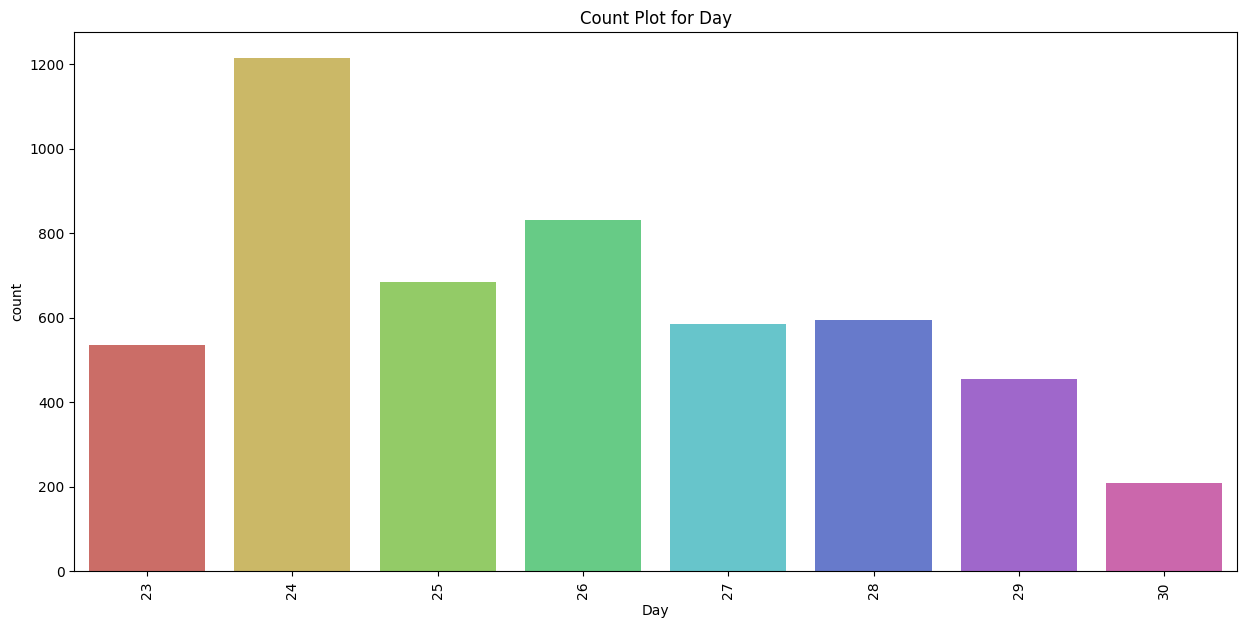

In [258]:
plt.figure(figsize=[15,7],)
plt.title('Count Plot for Day')
sns.countplot(x = 'Day', data = df1, palette = 'hls')
plt.xticks(rotation = 90)
plt.show()

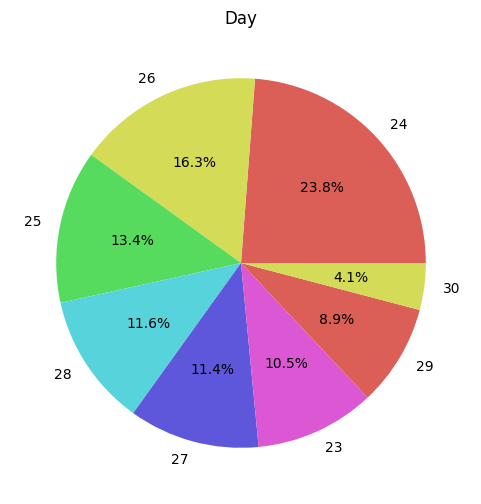

In [259]:
plt.figure(figsize=(15, 6))
counts = df1['Day'].value_counts()
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', colors=sns.color_palette('hls'))
plt.title('Day')
plt.show()

In [260]:
import plotly.graph_objects as go

In [261]:
fig = go.Figure(data=[go.Bar(x=df1['Day'].value_counts().index, y=df1['Day'].value_counts())])
fig.update_layout(
        title= 'Day',
        xaxis_title="Categories",
        yaxis_title="Count"
    )
fig.show()

In [262]:
counts = df1['Day'].value_counts()
fig = go.Figure(data=[go.Pie(labels=counts.index, values=counts)])
fig.update_layout(title= 'Day')
fig.show()

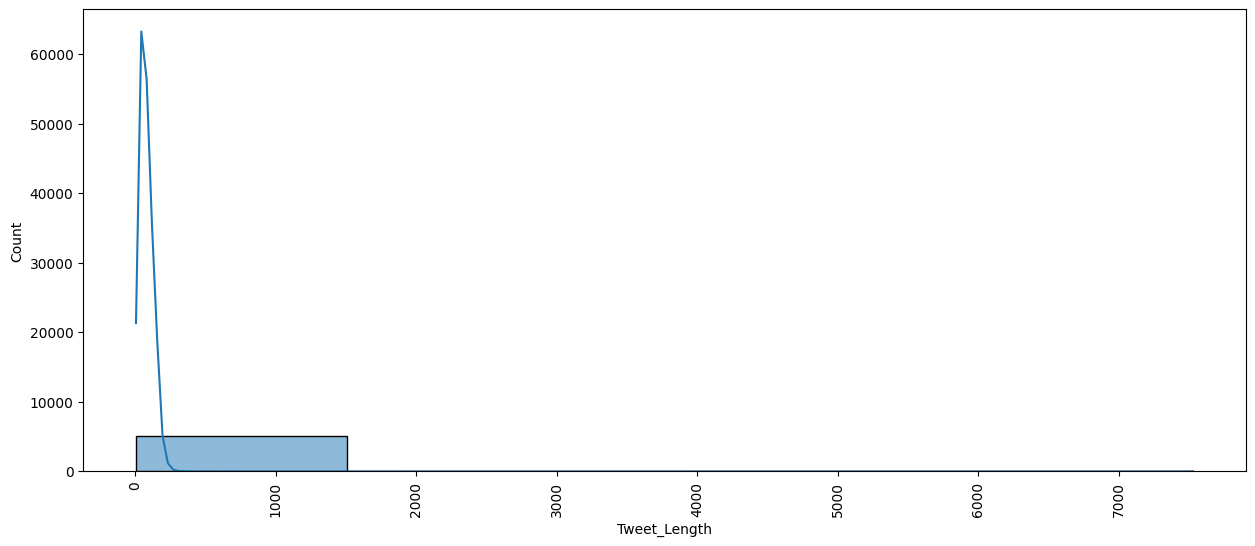

In [263]:
plt.figure(figsize=(15,6))
sns.histplot(df1['Tweet_Length'], kde = True, bins = 5, palette = 'hls')
plt.xticks(rotation = 90)
plt.show()

In [264]:
import plotly.express as px

fig = px.histogram(df1, x='Tweet_Length', nbins=20, histnorm='probability density')
fig.update_layout(title=f"Histogram of Tweet Length", xaxis_title='Tweet Length', yaxis_title="Probability Density")
fig.show()

In [265]:
fig = px.box(df1, y='Tweet_Length')
fig.update_layout(title=f"Box Plot of Tweet Length", yaxis_title='Tweet_Length')
fig.show()

In [266]:
spell = SpellChecker() 

In [267]:
def label_sentiment(x:float):
    if x < -0.05 : return 'negative'
    if x > 0.35 : return 'positive'
    return 'neutral'

In [268]:
sia = SIA()

In [269]:
df1['sentiment'] = [sia.polarity_scores(x)['compound'] for x in tqdm(df1['english_tweets'])]
df1['overall_sentiment'] = df1['sentiment'].apply(label_sentiment)

  0%|          | 0/5107 [00:00<?, ?it/s]

In [270]:
df1


Date Created  Number of Likes   
0     2023-06-30 09:21:00+00:00                0  \
1     2023-06-30 09:20:57+00:00                0   
3     2023-06-30 09:20:00+00:00                3   
5     2023-06-30 09:08:27+00:00                1   
8     2023-06-30 09:04:09+00:00                0   
...                         ...              ...   
9995  2023-06-23 10:09:41+00:00                1   
9996  2023-06-23 10:08:50+00:00                0   
9998  2023-06-23 10:08:17+00:00             3101   
9999  2023-06-23 10:08:01+00:00                0   
10000 2023-06-23 10:07:45+00:00                0   

                                                  Tweets   
0      #ENGvAUS #ENGvsAUS #AUSvENG #AUSvsENG #Adipuru...  \
1      Now Playing!! Book Your Ticket Now!! 🎥🍿🎟️\n@go...   
3      Adipurush VS 72 Hoorain VS The Kerala Story Co...   
5      This is how the story should be told. @omraut ...   
8      @VikasAgarwalll Milord says: If my compatriots...   
...                                                  ...   
9995   S Rangarajan garu, main poojari of chilkur bal...   
9996   Adipurush 1st Week WW Box Office Collections: ...   
9998   Let the empowering lyrics of #Shivoham elevate...   
9999   When it comes to choosing a service or product...   
10000  A film about #Ramayana, our greatest epic coul...   

                                          Cleaned_Tweets Language   
0      womens ashes live streaming broadcast tv chann...       en  \
1                                    playing book ticket       en   
3      adipurush vs hoorain vs kerala story controver...       en   
5      story told learn hotstar india graphic india g...       en   
8      milord compatriots backstab ie end exposing fa...       en   
...                                                  ...      ...   
9995   rangarajan garu poojari chilkur balaji appreci...       en   
9996   adipurush 1st week ww box office collections ఆ...       en   
9998   empowering lyrics elevate spirit envelop world...       en   
9999   choosing service product beneficial opt authen...       en   
10000  film greatest epic earn boc worth budget shame...       en   

                                          english_tweets  Year  Month  Day   
0      womens ashes live streaming broadcast tv chann...  2023      6   30  \
1                                    playing book ticket  2023      6   30   
3      adipurush vs hoorain vs kerala story controver...  2023      6   30   
5      story told learn hotstar india graphic india g...  2023      6   30   
8      milord compatriots backstab ie end exposing fa...  2023      6   30   
...                                                  ...   ...    ...  ...   
9995   rangarajan garu poojari chilkur balaji appreci...  2023      6   23   
9996   adipurush 1st week ww box office collections ఆ...  2023      6   23   
9998   empowering lyrics elevate spirit envelop world...  2023      6   23   
9999   choosing service product beneficial opt authen...  2023      6   23   
10000  film greatest epic earn boc worth budget shame...  2023      6   23   

           Time  Tweet_Length  sentiment overall_sentiment  
0      09:21:00            64     0.0000           neutral  
1      09:20:57            19     0.2023           neutral  
3      09:20:00            55     0.0000           neutral  
5      09:08:27           114     0.0000           neutral  
8      09:04:09           117     0.4767          positive  
...         ...           ...        ...               ...  
9995   10:09:41           153     0.7506          positive  
9996   10:08:50            89     0.0000           neutral  
9998   10:08:17           116     0.7845          positive  
9999   10:08:01           103     0.9274          positive  
10000  10:07:45           143     0.4404          positive  

[5107 rows x 13 columns]

In [271]:
df1['overall_sentiment'].unique()

array(['neutral', 'positive', 'negative'], dtype=object)

In [298]:
df1['overall_sentiment'].value_counts()

overall_sentiment
neutral     1990
negative    1783
positive    1334
Name: count, dtype: int64

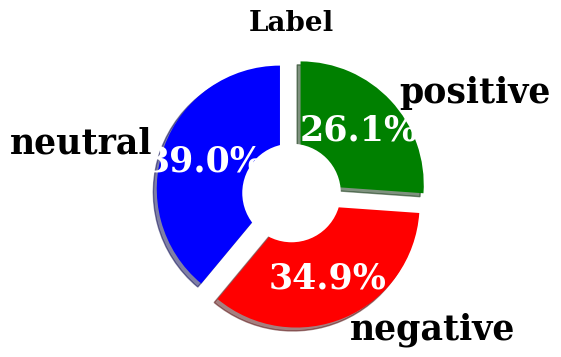

In [299]:
label_data = df1['overall_sentiment'].value_counts()

explode = (0.1, 0.1, 0.1)
plt.figure(figsize=(6, 4))
patches, texts, pcts = plt.pie(label_data,
                               labels = label_data.index,
                               colors = ['blue', 'red', 'green'],
                               pctdistance = 0.65,
                               shadow = True,
                               startangle = 90,
                               explode = explode,
                               autopct = '%1.1f%%',
                               textprops={ 'fontsize': 25,
                                           'color': 'black',
                                           'weight': 'bold',
                                           'family': 'serif' })
plt.setp(pcts, color='white')

hfont = {'fontname':'serif', 'weight': 'bold'}
plt.title('Label', size=20, **hfont)

centre_circle = plt.Circle((0,0),0.40,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.show()

In [275]:
fig = go.Figure(data=[go.Bar(x=df1['overall_sentiment'].value_counts().index, y=df1['overall_sentiment'].value_counts())])
fig.update_layout(
        title= 'Overall Sentiment',
        xaxis_title="Categories",
        yaxis_title="Count"
    )
fig.show()

In [276]:
counts = df1['overall_sentiment'].value_counts()
fig = go.Figure(data=[go.Pie(labels=counts.index, values=counts)])
fig.update_layout(title= 'Overall Sentiment')
fig.show()

In [277]:
df1.head(3)

Date Created  Number of Likes   
0 2023-06-30 09:21:00+00:00                0  \
1 2023-06-30 09:20:57+00:00                0   
3 2023-06-30 09:20:00+00:00                3   

                                              Tweets   
0  #ENGvAUS #ENGvsAUS #AUSvENG #AUSvsENG #Adipuru...  \
1  Now Playing!! Book Your Ticket Now!! 🎥🍿🎟️\n@go...   
3  Adipurush VS 72 Hoorain VS The Kerala Story Co...   

                                      Cleaned_Tweets Language   
0  womens ashes live streaming broadcast tv chann...       en  \
1                                playing book ticket       en   
3  adipurush vs hoorain vs kerala story controver...       en   

                                      english_tweets  Year  Month  Day   
0  womens ashes live streaming broadcast tv chann...  2023      6   30  \
1                                playing book ticket  2023      6   30   
3  adipurush vs hoorain vs kerala story controver...  2023      6   30   

       Time  Tweet_Length  sentiment overall_sentiment  
0  09:21:00            64     0.0000           neutral  
1  09:20:57            19     0.2023           neutral  
3  09:20:00            55     0.0000           neutral

In [278]:
df2 = df1[['english_tweets', 'overall_sentiment']]

In [279]:
df2.head(3)

english_tweets overall_sentiment
0  womens ashes live streaming broadcast tv chann...           neutral
1                                playing book ticket           neutral
3  adipurush vs hoorain vs kerala story controver...           neutral

In [280]:
def clean_text(text):
    # Remove non-alphabetic characters and convert to lowercase
    cleaned_text = re.sub('[^a-zA-Z]', ' ', text).lower()
    # Remove extra white spaces
    cleaned_text = re.sub('\s+', ' ', cleaned_text).strip()
    # Split the text into words
    words = cleaned_text.split()
    # Join the words back into a string
    cleaned_text = ' '.join(words)
    return cleaned_text

# Apply the clean_text function to the 'english_tweets' column
df2['Cleaned_English_Tweets'] = df2['english_tweets'].apply(clean_text)

In [281]:
df2.head(3)

english_tweets overall_sentiment   
0  womens ashes live streaming broadcast tv chann...           neutral  \
1                                playing book ticket           neutral   
3  adipurush vs hoorain vs kerala story controver...           neutral   

                              Cleaned_English_Tweets  
0  womens ashes live streaming broadcast tv chann...  
1                                playing book ticket  
3  adipurush vs hoorain vs kerala story controver...

In [282]:
df3 = df2[['Cleaned_English_Tweets', 'overall_sentiment']]

In [283]:
df3.head(3)

Cleaned_English_Tweets overall_sentiment
0  womens ashes live streaming broadcast tv chann...           neutral
1                                playing book ticket           neutral
3  adipurush vs hoorain vs kerala story controver...           neutral

In [284]:
non_meaningful_words = ['cr', 'amp', 'rs', 'u', 'l']

def remove_non_meaningful_words(text):
    tokens = text.split()
    filtered_tokens = [token for token in tokens if token not in non_meaningful_words]
    filtered_text = ' '.join(filtered_tokens)
    return filtered_text

df3['Cleaned_English_Tweets'] = df3['Cleaned_English_Tweets'].apply(remove_non_meaningful_words)

In [285]:
import wordcloud

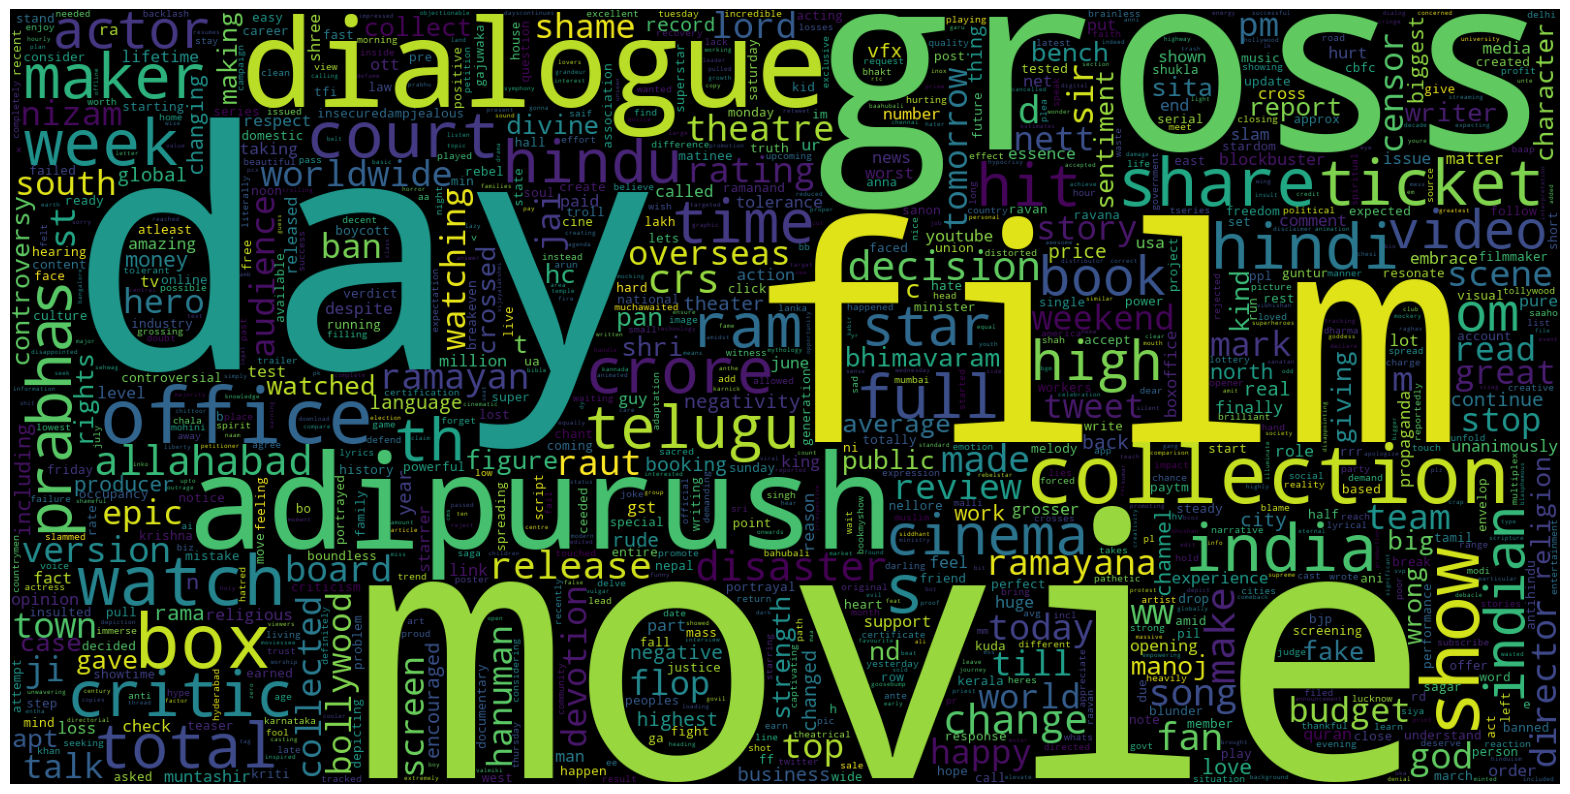

In [286]:
from wordcloud import WordCloud
data = df3['Cleaned_English_Tweets']
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(data))
plt.imshow(wc)
plt.axis('off')
plt.show()

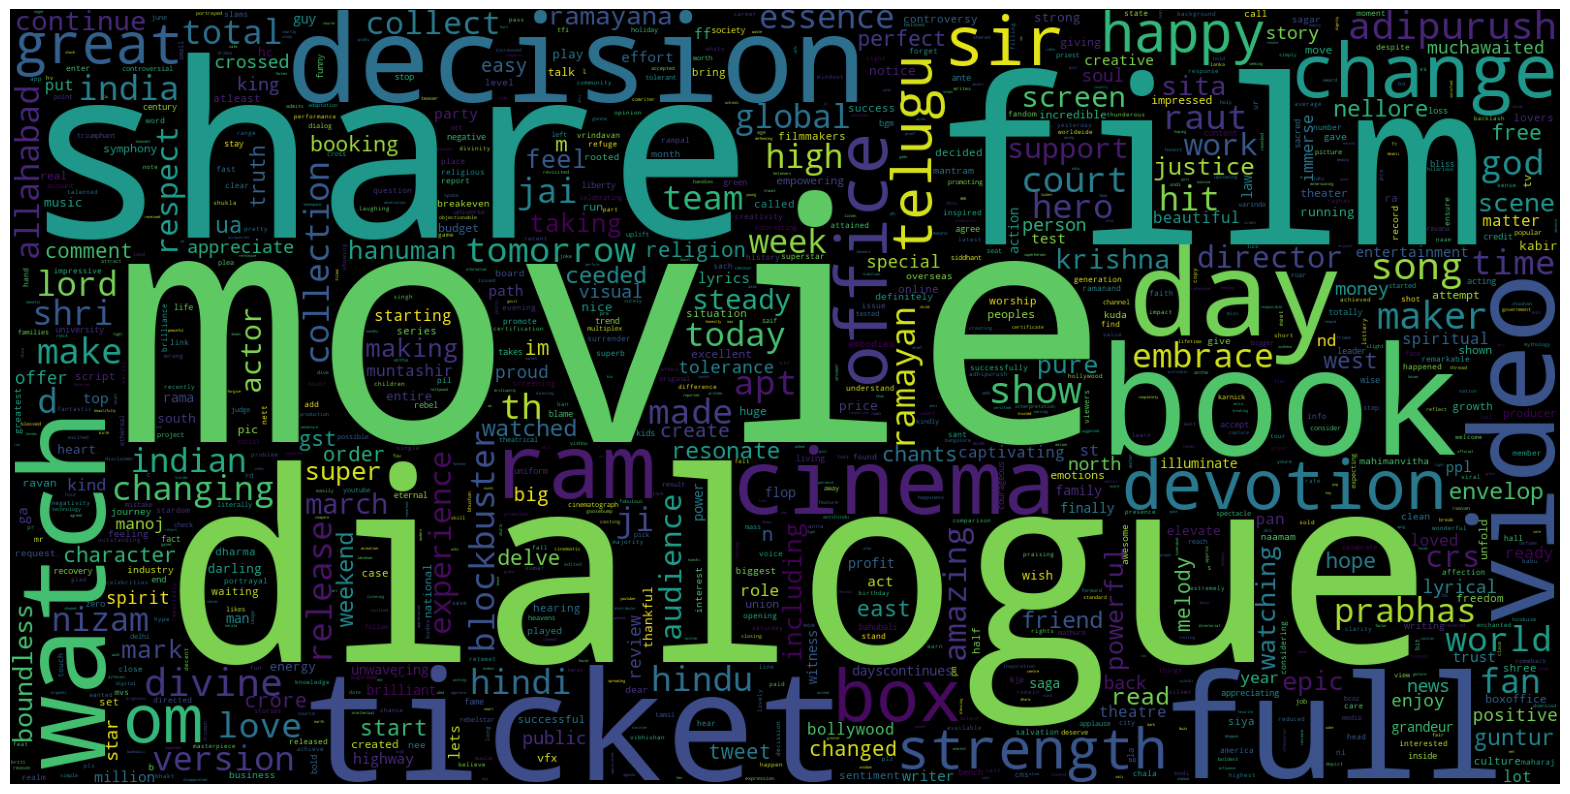

In [287]:
data = df3[df3['overall_sentiment']=="positive"]['Cleaned_English_Tweets']
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(data))
plt.imshow(wc)
plt.axis('off')
plt.show()

from PIL import Image
import numpy as np
data = df3[df3['overall_sentiment'] == "positive"]['Cleaned_English_Tweets']
text = " ".join(data)
wordcloud = WordCloud(max_words=1000, width=1600, height=800, collocations=False).generate(text)
image = wordcloud.to_image()
image_array = np.array(image)
fig = go.Figure(data=go.Image(z=image_array))
fig.update_layout(title_text="Word Cloud - Positive Tweets", width=800, height=600)
fig.show()

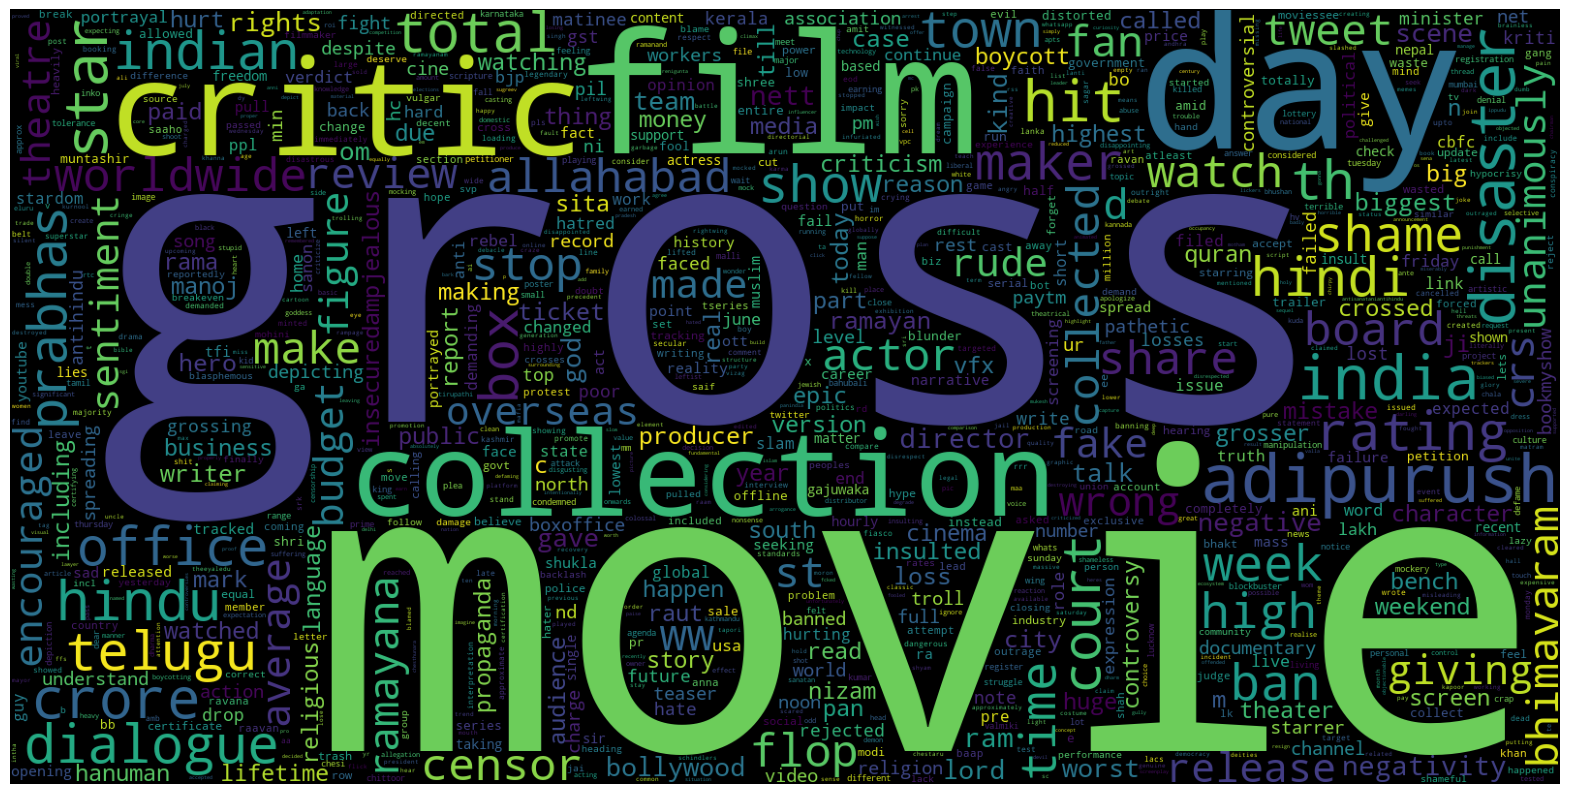

In [288]:
data = df3[df3['overall_sentiment']=="negative"]['Cleaned_English_Tweets']
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(data))
plt.imshow(wc)
plt.axis('off')
plt.show()

from PIL import Image
import numpy as np
data = df3[df3['overall_sentiment'] == "negative"]['Cleaned_English_Tweets']
text = " ".join(data)
wordcloud = WordCloud(max_words=1000, width=1600, height=800, collocations=False).generate(text)
image = wordcloud.to_image()
image_array = np.array(image)
fig = go.Figure(data=go.Image(z=image_array))
fig.update_layout(title_text="Word Cloud - Negative Tweets", width=800, height=600)
fig.show()

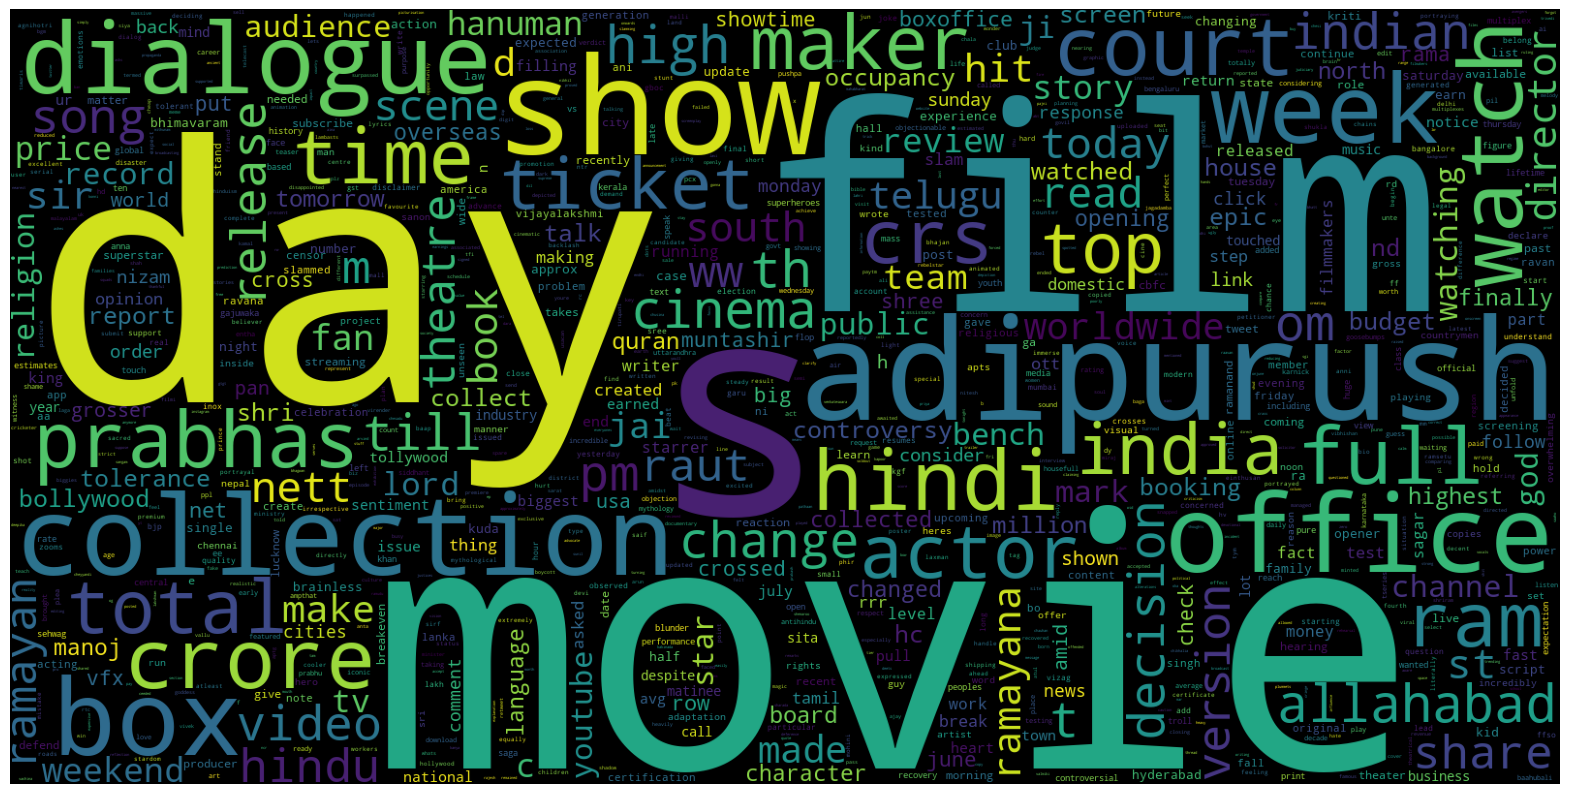

In [289]:
data = df3[df3['overall_sentiment']=="neutral"]['Cleaned_English_Tweets']
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(data))
plt.imshow(wc)
plt.axis('off')
plt.show()

import numpy as np
data = df3[df3['overall_sentiment'] == "neutral"]['Cleaned_English_Tweets']
text = " ".join(data)
wordcloud = WordCloud(max_words=1000, width=1600, height=800, collocations=False).generate(text)
image = wordcloud.to_image()
image_array = np.array(image)
fig = go.Figure(data=go.Image(z=image_array))
fig.update_layout(title_text="Word Cloud - Neutral Tweets", width=800, height=600)
fig.show()